# 1. Data preparation


## 1. Algorithms

I chose to use the decision tree, and the NB classifiers.
First, implement the DT method, for simplicity, I will use the sklearn DT

In [1]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


clf = tree.DecisionTreeClassifier()

In [2]:
#read in the data, then change some things into panda object
data_file = "/users/hanjiashu/desktop/Clothing_Store.csv"
dataFile = pd.read_csv(data_file)
data = dataFile
data

,CUSTOMER_ID,ZIP_CODE,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,...,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,9955600066402,1001,2,368.46,184.23,0,0.18,0.00,0.00,0.30,...,7,N,0,5,0,0.00,111.00,10,0.00,0
1,9955600073501,1028,4,258.00,64.50,1,0.26,0.16,0.00,0.00,...,7,Y,0,4,2,50.00,43.50,10,0.03,1
2,9955600076313,1056,2,77.00,38.50,0,1.00,0.00,0.00,0.00,...,7,N,0,4,0,0.00,68.60,16,0.00,0
3,9955600078045,1118,8,846.06,105.75,1,0.38,0.00,0.05,0.06,...,7,Y,0,9,6,66.67,26.96,10,0.00,0
4,9955600078517,1107,1,87.44,87.44,0,0.20,0.20,0.00,0.00,...,7,Y,0,0,0,0.00,24.50,20,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,9964400917586,63105,2,39.00,19.50,0,0.00,0.00,0.39,0.00,...,870,Y,0,1,0,0.00,107.66,1,1.51,0
21736,9964401018057,72207,6,280.59,46.76,0,0.02,0.00,0.00,0.06,...,4507,N,0,5,2,40.00,18.45,12,0.69,0
21737,9964401099104,77084,9,1274.96,141.66,0,0.29,0.04,0.01,0.14,...,1615,N,0,7,2,28.57,12.62,15,0.08,1
21738,9964401138852,78640,3,265.94,88.64,0,0.18,0.00,0.03,0.11,...,36,Y,0,7,0,0.00,32.12,38,0.37,0


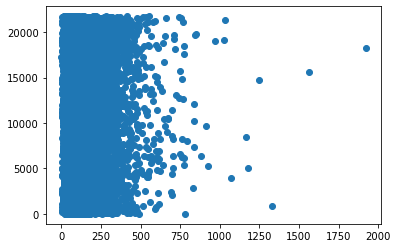

In [3]:
#first we plot to get a feel

plt.scatter((data["AVRG_SPENT_PER_VISIT"]),range(len(data["AVRG_SPENT_PER_VISIT"])))

# newdata = data[data["TOTAL_SPENT"]<4000]
# plt.scatter((newdata["TOTAL_SPENT"]),range((newdata["TOTAL_SPENT"]<3000).shape[0]))


### 1. we count how many outliers there are.

In [4]:
outliers = len(dataFile[(dataFile["TOTAL_SPENT"]>0) & (dataFile["TOTAL_SPENT"]<40)])
tot = len(dataFile)
print('spent less than 40',(outliers/tot) * 100)

outliers = len(dataFile[(dataFile["TOTAL_SPENT"]>3000)])
print('spent above 3000',(outliers/tot) * 100)

spent less than 40 0.9751609935602576
spent above 3000 0.970561177552898


## What to do with this information?
I first made uniform distributions, and tried to count them, then plot them to get a feel for the whole dataset.
I will plot two plots, one for the dataset with removed outliers, and one without removed outliers.

I did so with the small code below, goodData represents the one with no outliers, and the badData is the one with no processing.

In [5]:
goodData = dataFile[(dataFile["TOTAL_SPENT"]<3000) & (dataFile["TOTAL_SPENT"]>40)]
data = dataFile

In [6]:
bestVar = 100000
bestList = []
goodData = dataFile[(dataFile["TOTAL_SPENT"]<3000) & (dataFile["TOTAL_SPENT"]>40)]

badData = data


goodVariance = []
goodList = []

badVariance = []
badList = []

goodBest = 10000000000
badBest = 10000000000

for j in range(1, 50):
    goodSpentMax = int(goodData[['TOTAL_SPENT']].max())
    goodSpentMin = int(goodData[['TOTAL_SPENT']].min())
    goodInterval = (goodSpentMax - goodSpentMin)/j
    
    badSpentMax = int(badData[['TOTAL_SPENT']].max())
    badSpentMin = int(badData[['TOTAL_SPENT']].min())
    badInterval = (badSpentMax - badSpentMin)/j
    
    goodSpent = []
    badSpent = []
    
    for i in range(0,j):
        
        goodTot = goodData[
        (goodData['TOTAL_SPENT']>=(goodInterval*i)) &
            (goodData['TOTAL_SPENT']<(goodInterval*(i+1)))]
        
        badTot = badData[
        (badData['TOTAL_SPENT']>=(badInterval*i)) &
            (badData['TOTAL_SPENT']<(badInterval*(i+1)))]
        
        goodSpent.append(len(goodTot))
        badSpent.append(len(badTot))
    
    goodVar = np.var(goodSpent)
    badVar = np.var(badSpent)
    goodVariance.append(goodVar)
    badVariance.append(badVar)
    goodList.append(goodSpent)
    badList.append(badSpent)
#     if goodVar < goodBest and goodVar != 0:
#         goodBest = goodVar
#         goodList = goodSpent
#     if badVar < badBest and badVar != 0:
#         badBest = badVar
#         badList = badSpent


<function matplotlib.pyplot.show(close=None, block=None)>

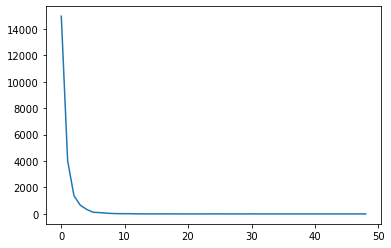

In [7]:
plt.plot(badList[48][:])
plt.title
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

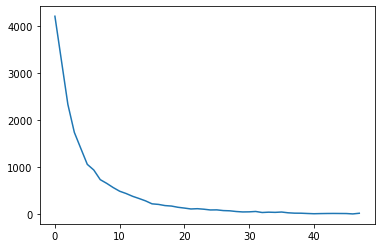

In [8]:
plt.plot(goodList[48][1:])
plt.show

I want to put it into bins.

#### To sum up what I am doing,
I want to put the total spent into bins, but I am not sure whether this is a good idea, so I will compare it with the one without any processisng.

In [9]:
goodData = dataFile[(dataFile["TOTAL_SPENT"]<3000) & (dataFile["TOTAL_SPENT"]>40)]

In [10]:
totLen = goodData.shape[0]
bins = [15]
print(goodData["TOTAL_SPENT"].max())
while bins[-1] < goodData["TOTAL_SPENT"].max():
    bins.append(bins[-1]*bins[-1])
    
print('Total: ', totLen)
print('Bin width: ', bins)

2999.96
Total:  21316
Bin width:  [15, 225, 50625]


In [11]:
powa = range(4)
bins = [] 
for i in range(4,int(goodData["TOTAL_SPENT"].max()**(1/3))+2):
    bins.append(i**3)
print(bins)

[64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375]


now I want to put all the data into the bins, by enumerating the classes by 1~binNum 

In [12]:
import warnings
warnings.filterwarnings('ignore')
processed = goodData
print(bins)
for i in range(1,len(bins)):
    if i == 1:
        processed.loc[processed['TOTAL_SPENT'] < bins[i]] = i
    else:
        processed.loc[
        ((processed['TOTAL_SPENT']>=bins[i-1]) &
            (processed['TOTAL_SPENT']<bins[i])),['TOTAL_SPENT']] = i


[64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375]


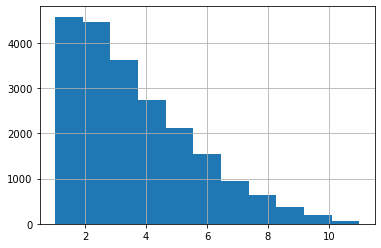

In [13]:
spentHist = goodData['TOTAL_SPENT']
hist = spentHist.hist(bins = len(bins)-1)

maybe this will make a change?

In [14]:
goodData.drop(['CUSTOMER_ID'],axis = 1)
goodData["VALPHON"].replace({"Y": 1, "N": 0}, inplace = True)
goodData['VALPHON']

# data.drop(['CUSTOMER_ID'],axis = 1)
data["VALPHON"].replace({"Y": 1, "N": 0}, inplace = True)
data['VALPHON']

0        0
1        1
2        0
3        1
4        1
        ..
21735    1
21736    0
21737    0
21738    1
21739    1
Name: VALPHON, Length: 21740, dtype: int64

In [15]:
goodData['ZIP_CODE'] = goodData['ZIP_CODE'].floordiv(10000)
data['ZIP_CODE'] = data['ZIP_CODE'].floordiv(10000)

print(data["ZIP_CODE"])

0        0
1        0
2        0
3        0
4        0
        ..
21735    6
21736    7
21737    7
21738    7
21739    9
Name: ZIP_CODE, Length: 21740, dtype: int64


Since cardinality of this attribute is very high. I leave only several most common, and put all the others into a category ‘other’, or in this case, -1. 


In [16]:
clust = [10,1,4,16,8,15,23,38]
clustD = {}

for i in range(0,(data["CLUSTYPE"].max())+1):
    if i in clust:
        pass
    else:
        clustD[i] = -1

data["CLUSTYPE"].replace(clustD, inplace = True)
goodData["CLUSTYPE"].replace(clustD, inplace = True)

print(goodData["CLUSTYPE"].values)

[10 10  1 ... 15 38 -1]


### 1.2 comparing classifiers

#### 1.2.1 Regression 

We first do regression with the discreted and continuous data, to see which one works better.

In [17]:
goodX = goodData.drop(['RESP'], axis=1).to_numpy().tolist()
goodY = goodData['RESP'].to_numpy().tolist()

X = data.drop(['RESP'], axis=1).to_numpy().tolist()
Y = data['RESP'].to_numpy().tolist()

In [18]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import warnings; warnings.simplefilter('ignore')

algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # default='lbfgs'
logreg = linear_model.LogisticRegression(solver=algorithms[4], random_state = 42)
X = data.drop(['RESP'], axis=1).to_numpy().tolist()
Y = data['RESP'].to_numpy().tolist()
goodScore = cross_val_score(logreg, goodX, goodY, cv=20)
goodAcc = np.mean(goodScore)

score = cross_val_score(logreg, X, Y, cv=20)
acc = np.mean(score)

print("bin: ",goodAcc)
print("cont: ",acc)


bin:  0.6344999515542284
cont:  0.8339006439742411


##### Unfortunately, it turns out that putting it into bins is completly useless, now continue just with "data"

### KNN 

before feeding the data in, we have to normalize it.

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
normalized = data.copy()
scaled = scaler.fit_transform(normalized) 
normalized.loc[:,:] = scaled
normalized

,CUSTOMER_ID,ZIP_CODE,TOTAL_VISITS,TOTAL_SPENT,AVRG_SPENT_PER_VISIT,HAS_CREDIT_CARD,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,...,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,0.000005,0.000000,0.008772,0.016324,0.095728,0.0,0.18,0.00,0.00,0.30,...,0.000533,0.0,0.0,0.454545,0.000000,0.0000,0.304773,0.282051,0.000000,0.0
1,0.000006,0.000000,0.026316,0.011417,0.033349,1.0,0.26,0.16,0.00,0.00,...,0.000533,1.0,0.0,0.363636,0.181818,0.5000,0.119288,0.282051,0.000733,1.0
2,0.000007,0.000000,0.008772,0.003377,0.019803,0.0,1.00,0.00,0.00,0.00,...,0.000533,0.0,0.0,0.363636,0.000000,0.0000,0.188261,0.435897,0.000000,0.0
3,0.000007,0.000000,0.061404,0.037541,0.054840,1.0,0.38,0.00,0.05,0.06,...,0.000533,1.0,0.0,0.818182,0.545455,0.6667,0.073837,0.282051,0.000000,0.0
4,0.000007,0.000000,0.000000,0.003840,0.045301,0.0,0.20,0.20,0.00,0.00,...,0.000533,1.0,0.0,0.000000,0.000000,0.0000,0.067077,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21735,0.999959,0.666667,0.008772,0.001689,0.009904,0.0,0.00,0.00,0.39,0.00,...,0.115585,1.0,0.0,0.090909,0.000000,0.0000,0.295595,0.051282,0.036901,0.0
21736,0.999970,0.777778,0.043860,0.012421,0.024107,0.0,0.02,0.00,0.00,0.06,...,0.600453,0.0,0.0,0.454545,0.181818,0.4000,0.050452,0.000000,0.016862,0.0
21737,0.999980,0.777778,0.070175,0.056594,0.073549,0.0,0.29,0.04,0.01,0.14,...,0.214905,0.0,0.0,0.636364,0.181818,0.2857,0.034432,0.410256,0.001955,1.0
21738,0.999984,0.777778,0.017544,0.011770,0.045926,0.0,0.18,0.00,0.03,0.11,...,0.004399,1.0,0.0,0.636364,0.000000,0.0000,0.088016,1.000000,0.009042,0.0


In [31]:
# data = data.drop(columns = ["CUSTOMER_ID"])

columns_to_drop = [
        'PSWEATERS', 'PKNIT_TOPS',
        'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS',
        'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION',
        'PLEGWEAR', 'PCOLLSPND','CUSTOMER_ID','SPEND_LAST_3MONTH', 'SPEND_LAST_6MONTH',
        'MAILED']

normalized = normalized.drop(columns=columns_to_drop, axis=1)

In [39]:
len(normalized.columns)

29

In [33]:
from sklearn.model_selection import train_test_split

X_normalized = normalized.drop(columns=['RESP' ])
Y_normalized = normalized['RESP'].values



X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y_normalized, test_size=0.5)

# Build a classifier
knn = KNeighborsClassifier(n_neighbors=3, weights = 'uniform')
knn.fit(X_train, Y_train)

print("Normalized train score:", knn.score(X_train, Y_train))
print("Normalized test score:", knn.score(X_test, Y_test))

Normalized train score: 0.8845446182152714
Normalized test score: 0.8145354185832566


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [40]:
new_knn = KNeighborsClassifier(weights='distance')
grid_dictionary = {'n_neighbors': range(30,45)}
gsc = GridSearchCV(cv=20, estimator=new_knn , param_grid=grid_dictionary)
gsc.fit(X_normalized, Y_normalized)
best = gsc.best_params_['n_neighbors']
print(gsc.best_params_)
print(best)

{'n_neighbors': 38}
38


In [42]:
from sklearn.model_selection import cross_val_score
import math

knn_cv = KNeighborsClassifier(n_neighbors=43)

knn_cv_scores = cross_val_score(knn_cv, X_normalized, Y_normalized, cv=20)
mean_score = np.mean(knn_cv_scores)
std_dev = knn_cv_scores.std()
true_std = std_dev / math.sqrt(knn_cv_scores.shape[0])
lower_bound = mean_score - 1.64 * true_std
upper_bound = mean_score + 1.64 * true_std

print(knn_cv_scores)
print('KNN: accuracy in [{:.4f} , {:.4f}] with 90% confidence'.format(lower_bound,upper_bound))

[0.83440662 0.8399264  0.84544618 0.84360626 0.84452622 0.84360626
 0.84820607 0.84268629 0.8399264  0.83808648 0.850046   0.84728611
 0.84176633 0.85464581 0.85188592 0.83532659 0.84268629 0.8399264
 0.850046   0.84544618]
KNN: accuracy in [0.8421 , 0.8459] with 90% confidence


In [36]:
from sklearn.model_selection import cross_val_score
import math

knn = KNeighborsClassifier(n_neighbors=best, weights='distance')
 
knn_cv_scores = cross_val_score(knn, X, Y, cv=20)

print(knn_cv_scores)

knn_cv_mean = np.mean(knn_cv_scores)

print('knn_cv_scores mean:{}'.format(knn_cv_mean))

[0.83440662 0.43330267 0.74057038 0.41214351 0.46642134 0.43606256
 0.35878565 0.45722171 0.39282429 0.76908924 0.46918123 0.44434223
 0.33210672 0.33026679 0.29438822 0.1674333  0.18123275 0.39374425
 0.43974241 0.83348666]
knn_cv_scores mean:0.4593376264949402


In [48]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(solver='saga', random_state = 42)

log_cv_scores = cross_val_score(logreg,X_normalized,Y_normalized, cv=20)
print(log_cv_scores)

log_cv_mean = np.mean(log_cv_scores)

print("mean: ", log_cv_mean)

[0.84084637 0.85372585 0.84820607 0.85556578 0.84820607 0.86292548
 0.85648574 0.850046   0.84820607 0.85188592 0.85556578 0.8574057
 0.85280589 0.85280589 0.85832567 0.84544618 0.85464581 0.84728611
 0.85280589 0.85280589]
mean:  0.8522999080036799


In [54]:
score_diffs =  knn_cv_scores-log_cv_scores 

# find mean of differences
mean_diffs =(score_diffs).mean()

# standard deviation of differences
std_diffs = (score_diffs).std()
variance = std_diffs/(20**0.5)
print("mean diffs: ",(mean_diffs))
print("std_diffs: ",(std_diffs))
print("variance: ", variance)

mean diffs:  -0.008325666973321062
std_diffs:  0.004613365508459298
variance:  0.001031579888196787


with confidence = 90%, and cv = 20, we choose the t value to be 2.101
so the bounds should be [0 - 2.101 variance,0+2.101 variance]


In [56]:
print("[",-2.101*variance,', +',2.101*variance)

[ -0.00216734934510145 , + 0.00216734934510145


   Unfortunately, the mean is outside of this interval, thus meaning that the null hypothesis is false. Meaning that there is significant difference between the two. And because the value is negative, this means that the logistic regression is significantly better than the neighbors method.

### Part 2
Business Analysis

In [206]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y_normalized, test_size=0.4, random_state=42)
fitted_model = logreg.fit(X_train, Y_train)

logistic_prob = logreg.predict_proba(X_test)
logistic_pred = logreg.predict(X_test)

res = pd.DataFrame({
'Prob': 1- logistic_prob[:,0],'Predict': logistic_pred,'Actual': Y_test
})


sorted_res = res.sort_values(['Prob'],ascending=False)
sorted_res['c_sum'] = sorted_res['Actual'].cumsum()
random_res = res
random_res['c_sum'] = random_res['Actual'].cumsum()


,Prob,Predict,Actual,c_sum
2789,0.986052,1.0,1.0,1.0
8284,0.977664,1.0,1.0,2.0
5767,0.963868,1.0,1.0,3.0
4303,0.959358,1.0,1.0,4.0
2865,0.958255,1.0,1.0,5.0
...,...,...,...,...
7012,0.000010,0.0,0.0,1496.0
3858,0.000010,0.0,0.0,1496.0
4437,0.000010,0.0,0.0,1496.0
216,0.000010,0.0,0.0,1496.0


The above is train test split, since we want to do this analysis for underlying new customers, I train the model on a part of the given data, and use the other part of data as the "new" customers.

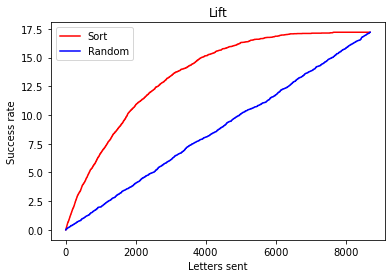

In [207]:
sorted_rate = sorted_res['c_sum']/len(np.arange(1,len(res)+1))
random_rate = random_res['c_sum']/len(np.arange(1,len(res)+1))

plt.plot(np.arange(1,len(res)+1), sorted_rate*100, label='Sort', c='r')
plt.plot(np.arange(1,len(res)+1), random_rate*100, label='Random', c='b')
plt.title("Lift")
plt.xlabel('Letters sent')
plt.ylabel('Success rate')
plt.legend()
plt.show()

the above is the lift chart, with the y axis the success rate, and x axis as the amount of letters sent.

In [192]:
cost = 4
benefit = 15


random = {
    'letters_sent': np.arange(1,len(res)+1),
    'cost': np.arange(1,len(res)+1) * cost,
    'benefit': random_res['c_sum'] * benefit
}

random_df = pd.DataFrame(random)

random_money = random_df['benefit'] - random_df['cost']
random_df['money'] = random_money

random_df

,letters_sent,cost,benefit,money
0,1,4,0.0,-4.0
1,2,8,0.0,-8.0
2,3,12,0.0,-12.0
3,4,16,0.0,-16.0
4,5,20,0.0,-20.0
...,...,...,...,...
8691,8692,34768,22440.0,-12328.0
8692,8693,34772,22440.0,-12332.0
8693,8694,34776,22440.0,-12336.0
8694,8695,34780,22440.0,-12340.0


the above is the amount of money in theory, I used 4 as the cost and 15 as the reward because can demonstrate what is trying to be achieved in this lab.

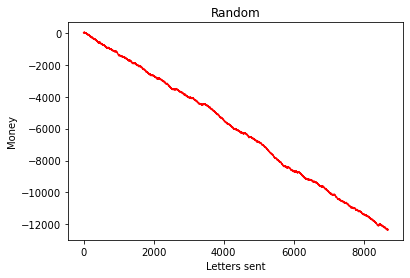

In [209]:
plt.plot(random_df['letters_sent'], random_df['money'], c='r')

plt.title("Random")
plt.xlabel('Letters sent')
plt.ylabel('Money')
plt.show()

a small plot indicating what would happen if emails are sent out at random

In [202]:
good = {'letters_sent': np.arange(1,len(res)+1),
        'cost': np.arange(1,len(res)+1) * cost,
        'benefit': sorted_res['c_sum'] * benefit}

good_df = pd.DataFrame(good)

expected_revenue = good_df['benefit'] - good_df['cost']
good_df['money'] = expected_revenue

good_df

,letters_sent,cost,benefit,money
2789,1,4,15.0,11.0
8284,2,8,30.0,22.0
5767,3,12,45.0,33.0
4303,4,16,60.0,44.0
2865,5,20,75.0,55.0
...,...,...,...,...
7012,8692,34768,22440.0,-12328.0
3858,8693,34772,22440.0,-12332.0
4437,8694,34776,22440.0,-12336.0
216,8695,34780,22440.0,-12340.0


the sorted good data.

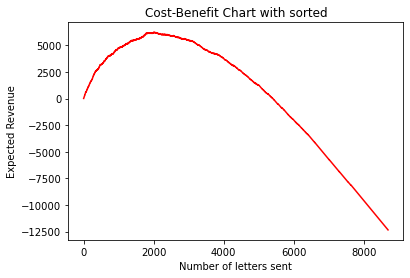

In [195]:
plt.plot(good_df['letters_sent'], good_df['money'], c='r')

plt.title("Sorted")
plt.xlabel('Number of letters sent')
plt.ylabel('Expected Revenue')
plt.show()

In conclusion, it is obvious that we should send out the letters via the sorted data, and the maximum profit occurs at the peak of the graph. 

In [197]:
good_money = np.max(good_df['money'])
print("Max Profit: $", sorted_max_profit)

good_money_actual = good_df[good_df['money'] == good_money]

good_number_letters = good_money_actual['letters_sent'].tolist()[0]

print("Number of letters sent: ", good_number_letters)

Max Profit: $ 6234.0
Number of letters sent:  2004
